In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FILEDIR = 'D:/Bates_Lomax_Whitworth_Paper/Loss_DATA/Overfit_CSV'

In [3]:
import os

In [4]:
print(os.listdir(FILEDIR))

['H_loss.csv', 'H_val_loss.csv', 'sigma_loss.csv', 'sigma_val_loss.csv', 'total_loss.csv', 'total_val_loss.csv']


In [5]:
DATA = []

for file in os.listdir(FILEDIR):
    name =file[0:-4]
    data = np.loadtxt(os.path.join(FILEDIR,file),delimiter=',',skiprows=1)
    DATA.append([name,data])

print(DATA)

[['H_loss', array([[1.55690475e+09, 0.00000000e+00, 9.78658829e+01],
       [1.55690483e+09, 1.00000000e+00, 8.05420727e-02],
       [1.55690490e+09, 2.00000000e+00, 5.71212210e-02],
       ...,
       [1.55693968e+09, 4.97000000e+02, 7.48094916e-03],
       [1.55693975e+09, 4.98000000e+02, 5.73577825e-03],
       [1.55693982e+09, 4.99000000e+02, 5.37359249e-03]])], ['H_val_loss', array([[1.55690475e+09, 0.00000000e+00, 8.79086852e-02],
       [1.55690483e+09, 1.00000000e+00, 6.95797503e-02],
       [1.55690490e+09, 2.00000000e+00, 3.48095857e-02],
       ...,
       [1.55693968e+09, 4.97000000e+02, 4.70567541e-03],
       [1.55693975e+09, 4.98000000e+02, 4.94019687e-03],
       [1.55693982e+09, 4.99000000e+02, 4.54915734e-03]])], ['sigma_loss', array([[1.55690475e+09, 0.00000000e+00, 2.62988809e+04],
       [1.55690483e+09, 1.00000000e+00, 4.10091788e-01],
       [1.55690490e+09, 2.00000000e+00, 2.48964012e-01],
       ...,
       [1.55693968e+09, 4.97000000e+02, 2.23651007e-02],
    

In [6]:
def smooth(x,window_len=11,window='hamming'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

def CMM(f,h):
    N=len(f)
    fCMM = np.zeros(N)
    for i in range(0,int(h/2)):
        fCMM[i] = np.median(f[:i+int(h/2)+1])
        fCMM[-i-1] = np.median(f[-i-int(h/2)-1:])
    for i in range(int(h/2),N-(int(h/2))):
        fCMM[i] = np.median(f[i-int(h/2):i+int(h/2)+1])
    return fCMM

def CMA(f,h):
    N=len(f)
    fCMA = np.zeros(N)
    for i in range(0,int(h/2)):
        fCMA[i] = np.mean(f[:i+int(h/2)+1])
        fCMA[-i-1] = np.mean(f[-i-int(h/2)-1:])
    for i in range(int(h/2),N-(int(h/2))):
        fCMA[i] = np.mean(f[i-int(h/2):i+int(h/2)+1])
    return fCMA

In [7]:
h = 21
alpha=0.2

fig = plt.figure(dpi=144, figsize=(640/144,1350/144))

ax1 = plt.subplot(311)
plt.plot(DATA[0][1][:,1],DATA[0][1][:,2], c='red', alpha=alpha)
plt.plot(CMM(DATA[0][1][:,2],h), label = 'Training', c='red')
plt.plot(DATA[1][1][:,1],DATA[1][1][:,2],c='blue', alpha=alpha)
plt.plot(CMM(DATA[1][1][:,2],h), label = 'Validation',c='blue')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend()
plt.ylabel(r'$\mathcal{L}_{\rm \beta$')
plt.ylim(0,0.01)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(DATA[2][1][:,1],DATA[2][1][:,2], c='red', alpha=alpha)
plt.plot(CMM(DATA[2][1][:,2],h), label = 'Training', c='red')
plt.plot(DATA[3][1][:,1],DATA[3][1][:,2],c='blue', alpha=alpha)
plt.plot(CMM(DATA[3][1][:,2],h), label = 'Validation',c='blue')
plt.legend()
plt.ylabel(r'$\mathcal{L}_{\rm \cal{S}}$')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylim(0,0.15)

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(DATA[4][1][:,1],DATA[4][1][:,2], c='red', alpha=alpha)
plt.plot(CMM(DATA[4][1][:,2],h), label = 'Training', c='red')
plt.plot(DATA[5][1][:,1],DATA[5][1][:,2],c='blue', alpha=alpha)
plt.plot(CMM(DATA[5][1][:,2],h), label = 'Validation',c='blue')
plt.ylim(0,0.15)
plt.xlabel('Epoch')
plt.ylabel(r'$\mathcal{L}$')
fig.subplots_adjust(wspace=0, hspace=0)
plt.legend()

plt.savefig('D:/Bates_Lomax_Whitworth_Paper/Overfit_Loss.png', bbox_inches = 'tight')
plt.show()

ValueError: 
\mathcal{L}_{\rm \beta
                      ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname} (at char 22), (line:1, col:23)

ValueError: 
\mathcal{L}_{\rm \beta
                      ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname} (at char 22), (line:1, col:23)

<Figure size 640x1350 with 3 Axes>

In [8]:
from scipy.signal import convolve, medfilt, savgol_filter

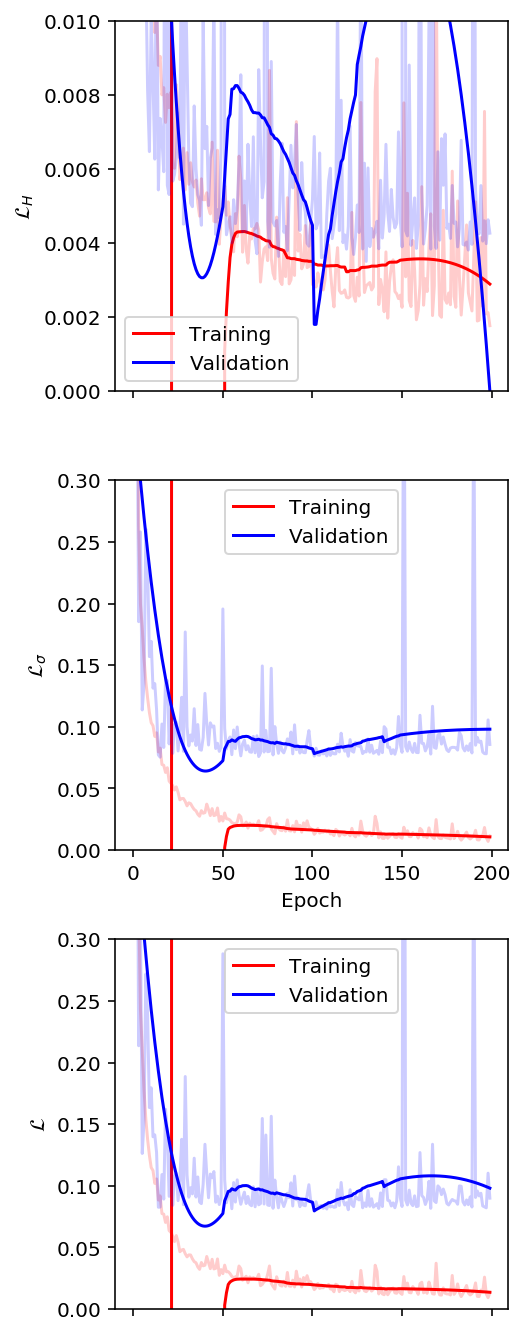

In [9]:
alpha=0.2

plt.figure(dpi=144, figsize=(540/144,1350/144))

ax1 = plt.subplot(311)
plt.plot(DATA[0][1][:,1],DATA[0][1][:,2], c='red', alpha=alpha)
plt.plot(DATA[0][1][:,1],medfilt(savgol_filter(DATA[0][1][:,2],101,3)), label = 'Training', c='red')
plt.plot(DATA[1][1][:,1],DATA[1][1][:,2],c='blue', alpha=alpha)
plt.plot(DATA[1][1][:,1],medfilt(savgol_filter(DATA[1][1][:,2],101,3)), label = 'Validation',c='blue')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend()
plt.ylabel(r'$\mathcal{L}_H$')
plt.ylim(0,0.01)

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(DATA[2][1][:,1],DATA[2][1][:,2], c='red', alpha=alpha)
plt.plot(DATA[2][1][:,1],savgol_filter(DATA[2][1][:,2],101,3), label = 'Training', c='red')
plt.plot(DATA[3][1][:,1],DATA[3][1][:,2],c='blue', alpha=alpha)
plt.plot(DATA[3][1][:,1],savgol_filter(DATA[3][1][:,2],101,3), label = 'Validation',c='blue')
plt.legend()
plt.ylabel(r'$\mathcal{L}_\sigma$')
plt.xlabel('Epoch')
plt.ylim(0,0.3)

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(DATA[4][1][:,1],DATA[4][1][:,2], c='red', alpha=alpha)
plt.plot(DATA[4][1][:,1],savgol_filter(DATA[4][1][:,2],101,3), label = 'Training', c='red')
plt.plot(DATA[5][1][:,1],DATA[5][1][:,2],c='blue', alpha=alpha)
plt.plot(DATA[5][1][:,1],savgol_filter(DATA[5][1][:,2],101,3), label = 'Validation',c='blue')
plt.ylim(0,0.3)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.ylabel(r'$\mathcal{L}$')
plt.legend()

plt.tight_layout()
#plt.savefig('D:/Bates_Lomax_Whitworth_Paper/Loss.png')
plt.show()